#### RSA...

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt


from auditory_cortex.analyses.rsa import RSA
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex import results_dir
from utils_jgm.tikz_pgf_helpers import tpl_save


def plot_line_with_shaded_region(data_dict, model_name, alpha=0.2, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    color = PlotterUtils.get_model_specific_color(model_name)
    means = []
    x_coordinates = []
    top_shaded = []
    bottom_shaded = []
    for layer_ID, layer_data in data_dict.items():
        layer_mean = np.mean(layer_data)
        layer_SEM = np.std(layer_data)#/np.sqrt(layer_data.size)
        
        x_coordinates.append(layer_ID)
        means.append(layer_mean)
        top_shaded.append(layer_mean + layer_SEM)
        bottom_shaded.append(layer_mean - layer_SEM)

        # medians.append(np.median(layer_data))
        # x_coordinates.append(layer_ID)
        # percentile_95.append(np.percentile(layer_data, 95))
        # percentile_5.append(np.percentile(layer_data, 5))
    
    ax.plot(x_coordinates, means, color=color)
    ax.fill_between(x=x_coordinates, y1=bottom_shaded, y2=top_shaded,
    alpha=alpha, color=color)
    



def RSA_plot_layer_wise(model_name, area='core', bin_width=20, 
                        itr=100, identifier='global', 
                        alpha=0.2):

    rsa = RSA(model_name=model_name, identifier=identifier)
    corr_dict = rsa.get_layer_wise_corr(
        area=area, bin_width=bin_width, iterations=itr, size=499
    )
    plot_line_with_shaded_region(corr_dict, model_name, alpha=alpha)
    plt.title(f"RSA, {model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([-0.1,0.4])

    filepath = os.path.join(results_dir, 'tikz_plots', f"RSA-layerwise-{area}-{model_name}.tex")
    PlotterUtils.save_tikz(filepath)
        


INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.


In [6]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)

from auditory_cortex.plotters import rsa_plotter
from auditory_cortex.analyses.rsa import RSA

%matplotlib inline

model_names = ['wave2letter_modified', 'wave2vec2',
                'deepspeech2', 'speech2text', 'whisper_tiny', 
                'whisper_base'
            ]


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [ ]:
i = 0
model_name = model_names[i]
area='core'
bin_width=20                        
itr=100
identifier='global'                         
alpha=0.2


rsa = RSA(model_name=model_name, identifier=identifier)
corr_dict = rsa.get_layer_wise_corr(
    area=area, bin_width=bin_width, iterations=itr, size=499
)
# plot_line_with_shaded_region(corr_dict, model_name, alpha=alpha)
# plt.title(f"RSA, {model_name}, bw-{bin_width}ms, area-{area}")
# plt.xlabel(f"Layer IDs")
# plt.ylabel(f"$\\rho$")
# plt.ylim([-0.1,0.4])

# filepath = os.path.join(results_dir, 'tikz_plots', f"RSA-layerwise-{area}-{model_name}")
# PlotterUtils.save_tikz(filepath)

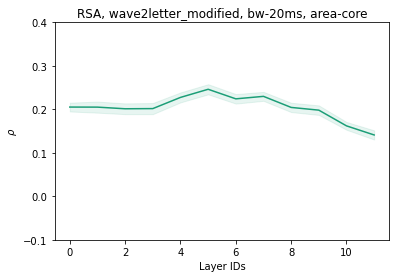

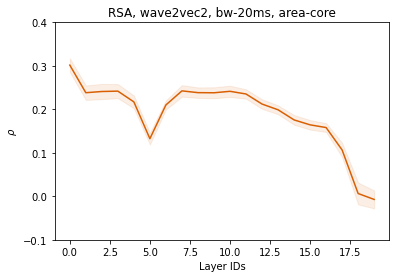

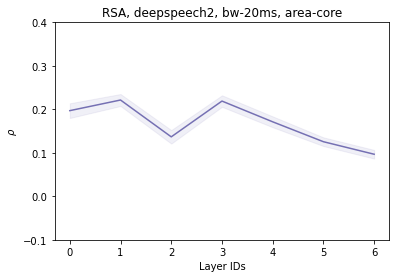

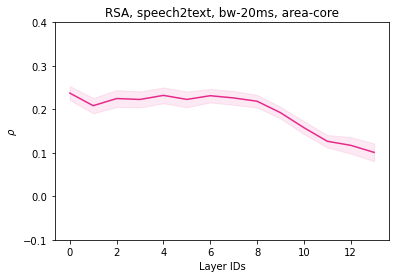

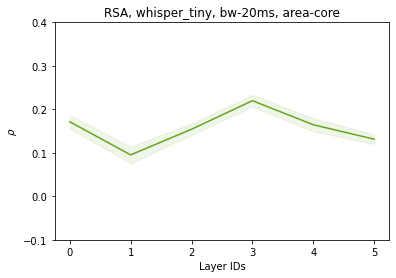

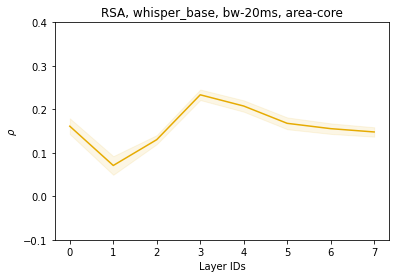

In [7]:
area = 'core'
bin_width = 20
alpha = 0.1
itr = 100

i = 0
for i in range(len(model_names)):

    model_name = model_names[i]

    RSA_plot_layer_wise(model_name,
                        area=area, bin_width=bin_width, alpha=alpha
                        )

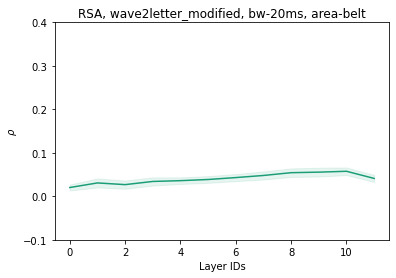

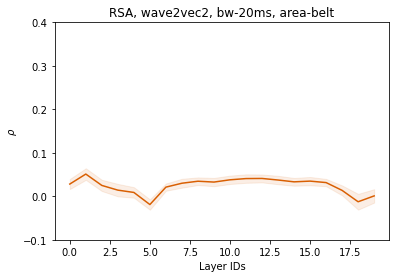

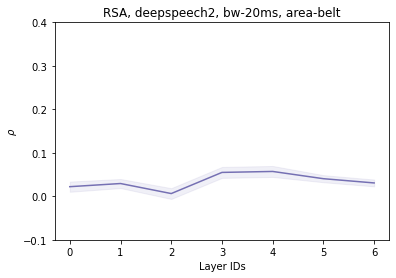

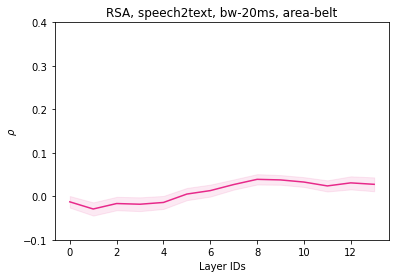

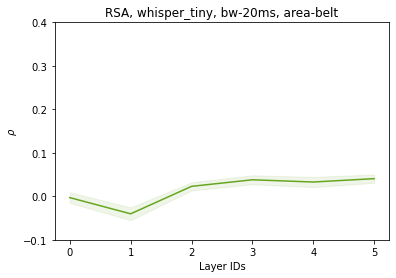

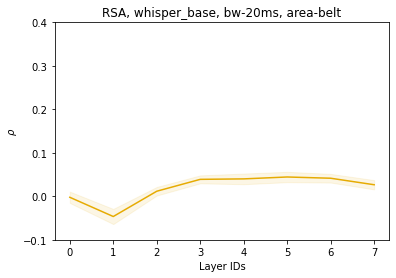

In [8]:
area = 'belt'
bin_width = 20
alpha = 0.1
itr = 100

i = 0
for i in range(len(model_names)):

    model_name = model_names[i]

    RSA_plot_layer_wise(model_name,
                        area=area, bin_width=bin_width, alpha=alpha
                        )

### peak layer vs bin_width

In [ ]:
model_names = ['wave2letter_modified', 'wave2vec2',
'deepspeech2', 'speech2text', 'whisper_tiny', 
'whisper_base']

ind = 0
model_name = model_names[ind] 
peak_layers = {}
peak_layer_means = {}
peak_layer_SEM = {}

dist_for_peak_layer = {}


bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
area = 'core'
# for model_name in model_names:
rsa = RSA(model_name=model_name)
for bin_width in bin_widths:
    corr_dict = rsa.get_layer_wise_corr(
        area=area, bin_width=bin_width
    )
    layer_means = {np.mean(v):k for k,v in corr_dict.items()}
    peak_mean = max(layer_means)
    peak_layer = layer_means[peak_median]

    dist_for_peak_layer[bin_width] = corr_dict[peak_layer]


plot_line_with_shaded_region(dist_for_peak_layer, model_name, alpha=alpha)
plt.title(f"RSA, peak-layer, {model_name}, area-{area}")
plt.xlabel(f"bin widths (ms)")
plt.ylabel(f"$\\rho$")
plt.ylim([-0.1,0.4])

filepath = os.path.join(results_dir, 'tikz_plots', f"RSA-peak-layer-{area}-{model_name}")
PlotterUtils.save_tikz(filepath)


    # peak_layers[bin_width] = peak_layer
    # peak_layer_means[bin_width] = peak_mean
    # peak_layer_SEM[bin_width] = layer_stds[peak_layer]/(np.sqrt(100))


### regression correlation...

In [1]:
import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

from auditory_cortex.analyses import Correlations
from auditory_cortex import results_dir, aux_dir, saved_corr_dir,model_names
from auditory_cortex.utils import CorrelationUtils

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline

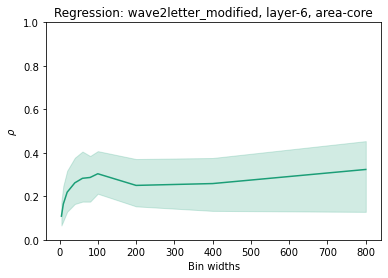

In [3]:
from auditory_cortex.plotters.correlation_plotter import RegPlotter
model_name='wave2letter_modified'
layer = 6
area = 'core'

RegPlotter.plot_one_network_layer_at_all_bin_width(model_name=model_name,
                                                layer=layer,
                                                area=area,
                                                save_tikz=False,

                                                normalized=False)

In [3]:
delay=0
threshold = 0.068
alpha=0.2
save_tikz=True
identifier='_sampling_rate_opt_neural_delay'
        

corr_obj = Correlations(model_name+identifier)
data_dist = corr_obj.get_corr_all_bin_widths_for_layer(
            neural_area=area, layer=layer,
            delay=delay, threshold=threshold
        )

In [4]:
data_dist.keys()

dict_keys([5, 10, 20, 40, 60, 80, 100, 200, 400, 800])

In [9]:

dict(sorted(data_dist.items(), key=lambda item: item[0])).keys()

dict_keys([5, 10, 20, 40, 60, 80, 100, 200, 400, 800])

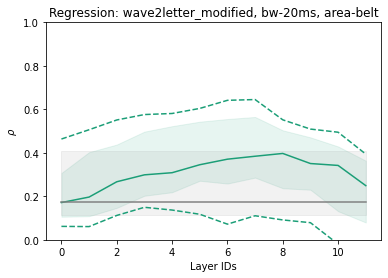

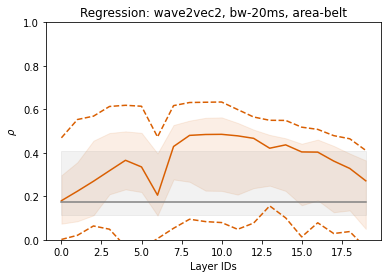

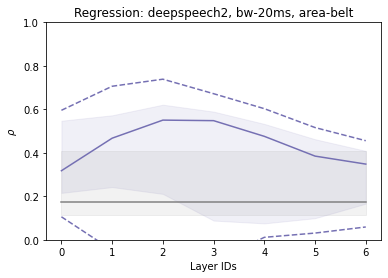

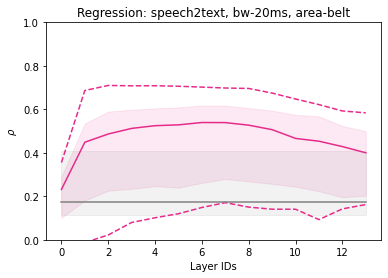

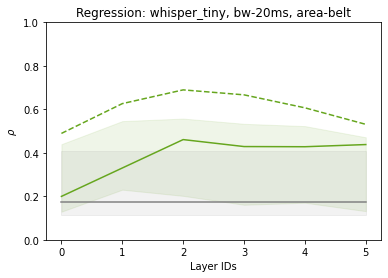

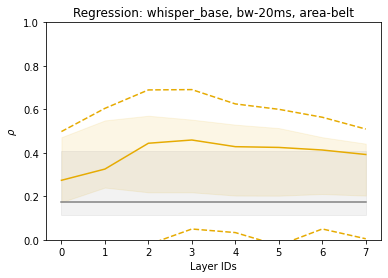

In [4]:
from auditory_cortex.plotters.correlation_plotter import RegPlotter
model_name='wave2letter_modified'
save_tikz = True
alpha = 0.1
bin_width = 20
area = 'belt'
identifier = '_opt_neural_delay'

for model_name in model_names:

    RegPlotter.plot_all_network_layers_at_bin_width(model_name=model_name,
                                                    bin_width=bin_width,
                                                    area=area,
                                                    alpha=alpha,
                                                    identifier=identifier,
                                                    save_tikz=save_tikz)

In [7]:
corr_obj = Correlations(model_name+identifier)
baseline_corr = corr_obj.get_baseline_corr_session(
    column='strf_corr_normalized', threshold=0.068)

In [9]:
baseline_corr.shape

(243,)

In [12]:
corr_obj.data[corr_obj.data['session']==200206]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,normalized_test_cc,layer_type
22260,200206.0,0.0,0.0,20.0,0.0,0.0,0.080474,0.183260,500.0,85.0,0.187985,conv
22261,200206.0,0.0,1.0,20.0,0.0,0.0,0.167089,0.221996,500.0,85.0,0.354630,conv
22262,200206.0,0.0,2.0,20.0,0.0,0.0,0.057237,0.139223,500.0,75.0,0.153397,conv
22263,200206.0,0.0,3.0,20.0,0.0,0.0,0.261582,0.413683,500.0,50.0,0.406700,conv
22264,200206.0,0.0,4.0,20.0,0.0,0.0,0.067013,0.122561,500.0,5.0,0.191419,conv
...,...,...,...,...,...,...,...,...,...,...,...,...
23023,200206.0,11.0,59.0,20.0,0.0,0.0,0.281054,0.506141,500.0,25.0,0.395052,conv
23024,200206.0,11.0,60.0,20.0,0.0,0.0,0.422774,0.579529,500.0,35.0,0.555355,conv
23025,200206.0,11.0,61.0,20.0,0.0,0.0,0.311219,0.445747,500.0,50.0,0.466146,conv
23026,200206.0,11.0,62.0,20.0,0.0,0.0,0.462904,0.550849,500.0,35.0,0.623698,conv


In [19]:
corr_obj.get_baseline_corr_session(threshold=0.068)

0       0.118883
1       0.197218
2       0.154856
3       0.331080
4       0.087961
          ...   
2331    0.151194
2336    0.132780
2351    0.136730
2353    0.170375
2374    0.210241
Name: strf_corr, Length: 243, dtype: float64

### SEM: demo

In [12]:
import numpy as np
N = 1000000
true_mean = 5
true_dist = true_mean + np.random.randn(N)

In [18]:
samples_available = 1000
sample = true_dist[:samples_available]

#### estimating the mean of the distribution...

In [28]:
itr = 10000
dist_of_estimate = []
for i in range(itr):
    sub_sample = np.random.choice(sample, size=samples_available, replace=True)
    dist_of_estimate.append(np.mean(sub_sample))
dist_of_estimate = np.array(dist_of_estimate)

In [30]:
np.mean(sample)

5.0405768295491535

In [32]:
np.mean(dist_of_estimate)

5.039856815422629

In [35]:
np.std(dist_of_estimate)#/np.sqrt(samples_available)

0.031674082116698934

In [34]:
np.std(dist_of_estimate)/np.sqrt(itr)

0.00031674082116698937

### rest of the code...